In [57]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
from datetime import datetime
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [5]:
df = pd.read_csv("../data/Zip_Zhvi_SingleFamilyResidence.csv")

In [6]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
count,15282.000,15282.000,15282.000,10843.000,10974.000,10998.000,11005.000,11018.000,11018.000,11018.000,...,15232.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000
mean,80125.483,46295.286,7641.500,123036.189,122971.396,122955.756,122978.601,123053.295,123168.660,123334.779,...,258309.913,259161.098,260118.846,261045.308,261971.018,262927.640,263803.226,264618.329,265565.816,266395.956
std,30816.445,28934.030,4411.678,78308.265,77822.431,77728.750,77712.302,77681.914,77730.936,77814.034,...,286788.579,287657.252,287840.275,287918.491,288476.692,289147.943,289719.317,290338.071,291066.856,291579.369
min,58196.000,1001.000,1.000,24400.000,23900.000,24200.000,24700.000,24700.000,25100.000,25300.000,...,31800.000,32100.000,31900.000,31200.000,30600.000,30600.000,30900.000,31400.000,32600.000,32700.000
25%,66785.250,21087.750,3821.250,75700.000,75900.000,76000.000,76000.000,76200.000,76225.000,76300.000,...,122100.000,122500.000,123100.000,123700.000,124100.000,124700.000,125100.000,125600.000,126025.000,126500.000
50%,77175.000,44306.500,7641.500,104300.000,104450.000,104500.000,104600.000,104900.000,105000.000,105100.000,...,176800.000,177400.000,178300.000,179200.000,179900.000,180600.000,181300.000,182000.000,182500.000,183100.000
75%,88700.500,70399.500,11461.750,147100.000,147200.000,147100.000,147400.000,147475.000,147575.000,147600.000,...,288425.000,289200.000,290300.000,291375.000,292300.000,293400.000,294800.000,296000.000,297400.000,298750.000
max,738092.000,99901.000,15282.000,1769000.000,1768100.000,1766900.000,1764200.000,1762200.000,1762600.000,1763900.000,...,6299300.000,6360300.000,6336400.000,6255500.000,6294300.000,6403700.000,6468900.000,6489100.000,6492000.000,6475600.000


#### Clean Up DataFrame
Rename RegionName to ZipCode and Change Zip Code to String 

In [7]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,84654,60657,Chicago,IL,Chicago,Cook,1.000,420800.000,423500.000,426200.000,...,1097900.000,1098300.000,1094700.000,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000
1,84616,60614,Chicago,IL,Chicago,Cook,2.000,542400.000,546700.000,551700.000,...,1522800.000,1525900.000,1525000.000,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000
2,93144,79936,El Paso,TX,El Paso,El Paso,3.000,70900.000,71200.000,71100.000,...,114200.000,114300.000,114200.000,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000
3,84640,60640,Chicago,IL,Chicago,Cook,4.000,298200.000,297400.000,295300.000,...,739400.000,743100.000,741500.000,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000
4,61807,10467,New York,NY,New York,Bronx,5.000,nan,nan,nan,...,391600.000,388900.000,388800.000,391100.000,394400.000,396900.000,398600.000,400500.000,402600.000,403700.000


In [8]:
median_prices = df.median()
#sf_prices = df["City"] == "San Francisco".median()


In [9]:
median_prices.tail()

2017-05   180600.000
2017-06   181300.000
2017-07   182000.000
2017-08   182500.000
2017-09   183100.000
dtype: float64

In [10]:
#sf_prices = df["RegionName"] == "San Francisco".median()
marin_df = df[df["CountyName"] == "Marin"].median()
sf_df = df[df["City"] == "San Francisco"].median()
palo_alto = df[df["City"] == "Palo Alto"].median()
df_comparison = pd.concat([marin_df, sf_df, palo_alto, median_prices], axis=1)
df_comparison.columns = ["Marin County", "San Francisco", "Palo Alto", "Median USA"]

##### Cluster on Size Rank and Price


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
columns_to_drop = ['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [13]:
df_numerical.describe()

,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
count,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,...,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000,10015.000
mean,6901.275,124233.839,124346.890,124445.791,124517.993,124594.988,124709.356,124879.700,125125.172,125469.755,...,275726.231,277007.289,278042.496,279015.157,279936.805,280915.696,281880.929,282792.521,283862.696,284821.967
std,4300.338,78083.175,77917.627,77830.951,77776.606,77746.268,77742.096,77791.639,77894.556,78146.593,...,272648.369,273619.541,273787.430,273932.988,274594.533,275399.805,276184.285,276903.768,277813.140,278583.832
min,1.000,24500.000,24500.000,24800.000,24800.000,24700.000,25100.000,25600.000,26000.000,26200.000,...,35600.000,35000.000,34200.000,33800.000,33800.000,33300.000,32900.000,32800.000,32800.000,32800.000
25%,3166.500,77200.000,77300.000,77300.000,77300.000,77500.000,77700.000,77800.000,77900.000,78100.000,...,135150.000,135950.000,136700.000,137300.000,138200.000,138750.000,139200.000,139800.000,140100.000,140700.000
50%,6578.000,105700.000,106100.000,106400.000,106400.000,106700.000,107000.000,107300.000,107500.000,107900.000,...,198400.000,199600.000,200700.000,202300.000,203300.000,204200.000,205200.000,206100.000,207200.000,207800.000
75%,10462.000,148000.000,148200.000,148500.000,148700.000,148900.000,148900.000,149000.000,149100.000,149600.000,...,319500.000,320700.000,322100.000,322800.000,323200.000,324250.000,325150.000,327000.000,328000.000,329500.000
max,15281.000,1769000.000,1768100.000,1766900.000,1764200.000,1762200.000,1762600.000,1763900.000,1763800.000,1764400.000,...,5566400.000,5589200.000,5615700.000,5645200.000,5696000.000,5743800.000,5769800.000,5744500.000,5706500.000,5676900.000


In [14]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

10015


In [15]:
cluster_df = df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2017-09"]/cluster_df["1996-04"],2)
cluster_df['CityZipCodeAppRatio'] = cluster_df['City'].map(str) + "-" + cluster_df['ZipCode'] + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,cluster,appreciation_ratio,CityZipCodeAppRatio
0,84654,60657,Chicago,IL,Chicago,Cook,1.000,420800.000,423500.000,426200.000,...,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000,2,2.480,Chicago-60657-2.48
1,84616,60614,Chicago,IL,Chicago,Cook,2.000,542400.000,546700.000,551700.000,...,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000,2,2.810,Chicago-60614-2.81
2,93144,79936,El Paso,TX,El Paso,El Paso,3.000,70900.000,71200.000,71100.000,...,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000,1,1.600,El Paso-79936-1.6
3,84640,60640,Chicago,IL,Chicago,Cook,4.000,298200.000,297400.000,295300.000,...,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000,0,2.380,Chicago-60640-2.38
5,91733,77084,Houston,TX,Houston,Harris,6.000,76700.000,76500.000,76000.000,...,154700.000,155500.000,158700.000,160600.000,161300.000,161800.000,161500.000,1,2.110,Houston-77084-2.11


In [16]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [19]:
cluster_df.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', 'cluster', 'appreciation_ratio', 'CityZipCodeAppRatio'],
      dtype='object', length=268)

In [20]:
newdf = cluster_df.copy()
newdf = newdf.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName','SizeRank','cluster', 'appreciation_ratio', 'CityZipCodeAppRatio'],axis = 1)
newdf.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,60657,420800.000,423500.000,426200.000,428600.000,429900.000,432300.000,436400.000,435600.000,427400.000,...,1097900.000,1098300.000,1094700.000,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000
1,60614,542400.000,546700.000,551700.000,565000.000,574200.000,581600.000,591500.000,591200.000,581100.000,...,1522800.000,1525900.000,1525000.000,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000
2,79936,70900.000,71200.000,71100.000,71300.000,71400.000,71900.000,72700.000,73100.000,72700.000,...,114200.000,114300.000,114200.000,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000
3,60640,298200.000,297400.000,295300.000,294600.000,295700.000,296500.000,296300.000,294300.000,291000.000,...,739400.000,743100.000,741500.000,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000
5,77084,76700.000,76500.000,76000.000,75800.000,75700.000,75600.000,75700.000,75900.000,76100.000,...,160500.000,158400.000,156100.000,154700.000,155500.000,158700.000,160600.000,161300.000,161800.000,161500.000


use stack to convert dataframe with multiple columns of dates into rows as a time series format

In [26]:
newdf = newdf.set_index('ZipCode')

In [27]:
newdf.index

Index(['60657', '60614', '79936', '60640', '77084', '77449', '32162', '60647',
       '37211', '90250',
       ...
       '21865', '92341', '29074', '63041', '84781', '12429', '97028', '1338',
       '3293', '21405'],
      dtype='object', name='ZipCode', length=10015)

In [55]:
newdf.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
ZipCode,,,,,,,,,,,,,,,,,,,,,
60657,420800.000,423500.000,426200.000,428600.000,429900.000,432300.000,436400.000,435600.000,427400.000,421600.000,...,1097900.000,1098300.000,1094700.000,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000
60614,542400.000,546700.000,551700.000,565000.000,574200.000,581600.000,591500.000,591200.000,581100.000,575100.000,...,1522800.000,1525900.000,1525000.000,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000
79936,70900.000,71200.000,71100.000,71300.000,71400.000,71900.000,72700.000,73100.000,72700.000,72700.000,...,114200.000,114300.000,114200.000,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000
60640,298200.000,297400.000,295300.000,294600.000,295700.000,296500.000,296300.000,294300.000,291000.000,288100.000,...,739400.000,743100.000,741500.000,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000
77084,76700.000,76500.000,76000.000,75800.000,75700.000,75600.000,75700.000,75900.000,76100.000,76600.000,...,160500.000,158400.000,156100.000,154700.000,155500.000,158700.000,160600.000,161300.000,161800.000,161500.000


Use df.stack to convert a dataframe to series with multiple index, use series.unstack to do the reverse.

In [40]:
newse = newdf.stack();newse.head()

ZipCode         
60657    1996-04   420800.000
         1996-05   423500.000
         1996-06   426200.000
         1996-07   428600.000
         1996-08   429900.000
dtype: float64

In [53]:
ee = newse.unstack()

In [54]:
ee.head()

date,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
zip,,,,,,,,,,,,,,,,,,,,,
60657,420800.000,423500.000,426200.000,428600.000,429900.000,432300.000,436400.000,435600.000,427400.000,421600.000,...,1097900.000,1098300.000,1094700.000,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000
60614,542400.000,546700.000,551700.000,565000.000,574200.000,581600.000,591500.000,591200.000,581100.000,575100.000,...,1522800.000,1525900.000,1525000.000,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000
79936,70900.000,71200.000,71100.000,71300.000,71400.000,71900.000,72700.000,73100.000,72700.000,72700.000,...,114200.000,114300.000,114200.000,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000
60640,298200.000,297400.000,295300.000,294600.000,295700.000,296500.000,296300.000,294300.000,291000.000,288100.000,...,739400.000,743100.000,741500.000,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000
77084,76700.000,76500.000,76000.000,75800.000,75700.000,75600.000,75700.000,75900.000,76100.000,76600.000,...,160500.000,158400.000,156100.000,154700.000,155500.000,158700.000,160600.000,161300.000,161800.000,161500.000


In [44]:
newse.index.names = ['zip','date']

In [45]:
newse.head()

zip    date   
60657  1996-04   420800.000
       1996-05   423500.000
       1996-06   426200.000
       1996-07   428600.000
       1996-08   429900.000
dtype: float64

In [47]:
newse['60657','1996-04']

420800.0

In [142]:
ts = newse['60657']

In [49]:
newse.mean(level = 'zip').head()

zip
60657    814027.132
60614   1203062.791
79936     99577.519
60640    550604.651
77084    113881.008
dtype: float64

Time series basic tutorial

In [59]:
now = datetime.now();now

datetime.datetime(2018, 1, 29, 17, 52, 51, 509055)

In [63]:
from datetime import timedelta

In [62]:
now + timedelta(25)

datetime.datetime(2018, 2, 23, 17, 52, 51, 509055)

In [64]:
now.strftime('%Y-%m-%d')

'2018-01-29'

In [74]:
now.strftime('%y-%m-%d')

'18-01-29'

In [65]:
from dateutil.parser import parse

In [73]:
parse('Jan 29, 2018 06:45 PM')

datetime.datetime(2018, 1, 29, 18, 45)

In [143]:
ts.index = pd.to_datetime(ts.index)

In [144]:
ts.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01'],
              dtype='datetime64[ns]', name='date', length=258, freq=None)

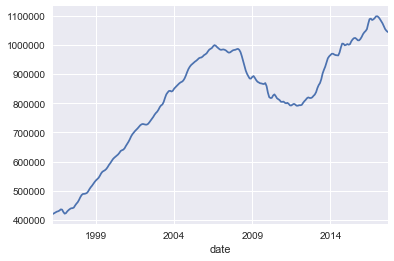

In [145]:
ts.plot()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """Entry point for launching an IPython kernel.


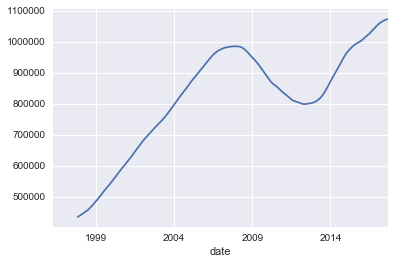

In [146]:
pd.rolling_mean(ts,20).plot()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,min_periods=5,center=False).std()
  """Entry point for launching an IPython kernel.


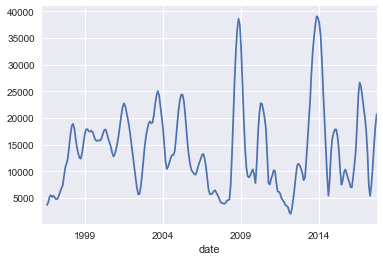

In [147]:
pd.rolling_std(ts,10,min_periods = 5).plot()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


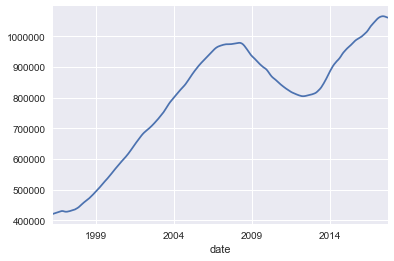

In [148]:
pd.ewma(ts,span = 20).plot()

## Estimating & Eliminating Trend 

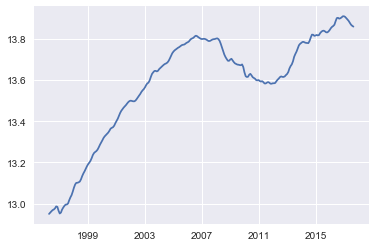

In [149]:
ts_log = np.log(ts)
plt.plot(ts_log)

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


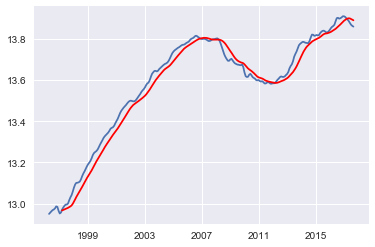

In [150]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [151]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
1996-04-01     nan
1996-05-01     nan
1996-06-01     nan
1996-07-01     nan
1996-08-01     nan
1996-09-01     nan
1996-10-01     nan
1996-11-01     nan
1996-12-01     nan
1997-01-01     nan
1997-02-01     nan
1997-03-01   0.004
dtype: float64

In [154]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


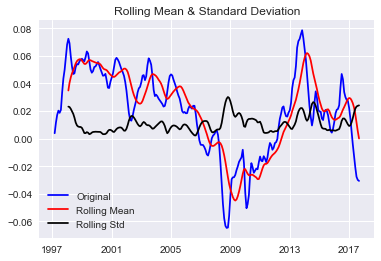

Results of Dickey-Fuller Test:
Test Statistic                 -1.637
p-value                         0.464
#Lags Used                     15.000
Number of Observations Used   231.000
Critical Value (1%)            -3.459
Critical Value (5%)            -2.874
Critical Value (10%)           -2.573
dtype: float64


In [155]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


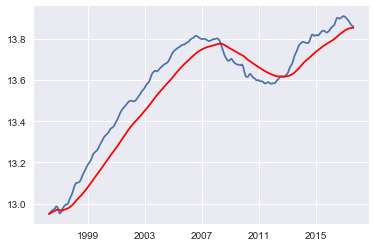

In [157]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


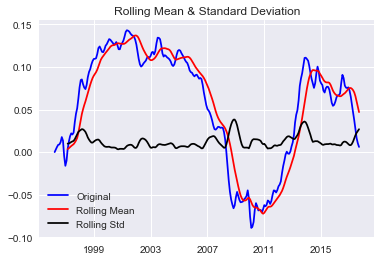

Results of Dickey-Fuller Test:
Test Statistic                 -2.185
p-value                         0.212
#Lags Used                     15.000
Number of Observations Used   242.000
Critical Value (1%)            -3.458
Critical Value (5%)            -2.874
Critical Value (10%)           -2.573
dtype: float64


In [158]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality 

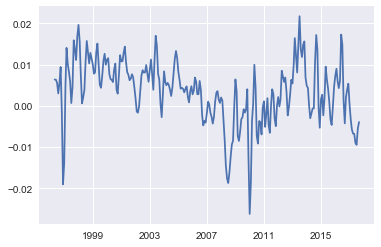

In [159]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


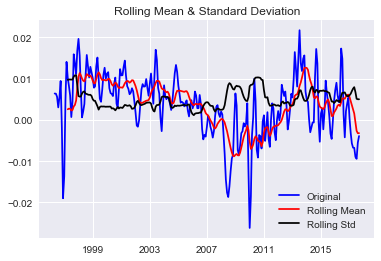

Results of Dickey-Fuller Test:
Test Statistic                 -1.421
p-value                         0.572
#Lags Used                     14.000
Number of Observations Used   242.000
Critical Value (1%)            -3.458
Critical Value (5%)            -2.874
Critical Value (10%)           -2.573
dtype: float64


In [160]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

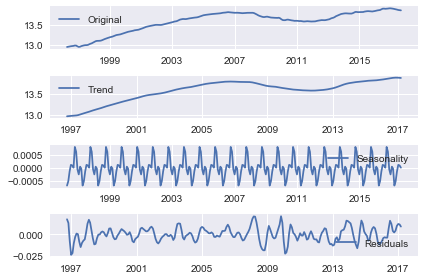

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


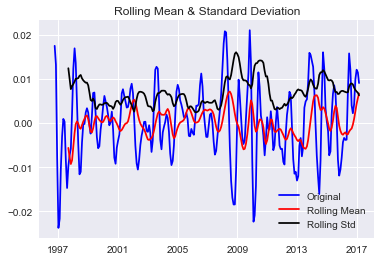

Results of Dickey-Fuller Test:
Test Statistic                 -5.059
p-value                         0.000
#Lags Used                     13.000
Number of Observations Used   232.000
Critical Value (1%)            -3.459
Critical Value (5%)            -2.874
Critical Value (10%)           -2.573
dtype: float64


In [162]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

test statstic is lower than 1% critical value, so this TS is stationary with 99% confidence.

## Forecasting a Time Series

ARIMA stands for **Auto-Regressive Integrated Moving Averages**. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. **Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. **Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. **Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

1. **Autocorrelation Function (ACF)**: It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. **Partial Autocorrelation Function (PACF)**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [163]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [164]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

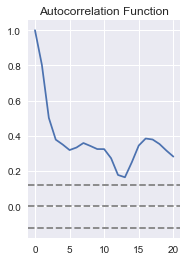

In [165]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

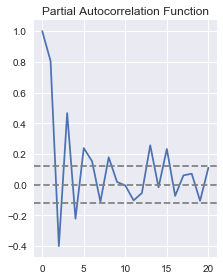

In [166]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines that on either sides of 0 is the confidence intereval. These can be used to determine the ‘p’ and ‘q’ values as:

1. p – The lag value where the PACF chart crosses the upper confidence interval for the first time. In this case p=0.
2. q – The lag value where the ACF chart crosses the upper confidence interval for the first time. In this case q=2.

In [167]:
from statsmodels.tsa.arima_model import ARIMA

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases:

## AR Model

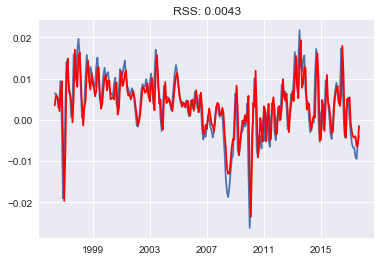

In [168]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA Model 

In [171]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

## Combined Model 

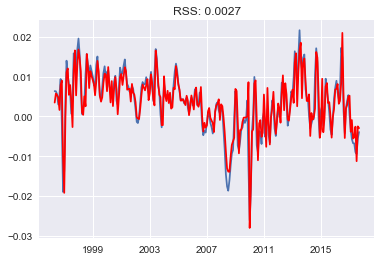

In [172]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [174]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
1996-05-01   0.004
1996-06-01   0.006
1996-07-01   0.005
1996-08-01   0.005
1996-09-01   0.002
dtype: float64

In [176]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
1996-05-01   0.004
1996-06-01   0.009
1996-07-01   0.015
1996-08-01   0.019
1996-09-01   0.021
dtype: float64

In [177]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
1996-04-01   12.950
1996-05-01   12.953
1996-06-01   12.959
1996-07-01   12.965
1996-08-01   12.969
dtype: float64

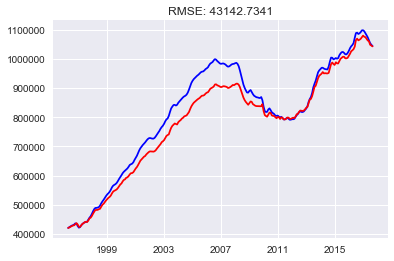

In [179]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, color = 'blue')
plt.plot(predictions_ARIMA, color = 'red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))